In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing Dataset from Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ML Projects/Bitcoin Prediction/bitcoin.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1048575, 8)

In [ ]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.048575e+06,342169.000000,342169.000000,342169.000000,342169.000000,342169.000000,3.421690e+05,342169.000000
mean,1.356775e+09,229.456116,229.802477,229.064930,229.440478,16.274528,4.485655e+03,229.420213
std,1.816186e+07,271.716593,272.238257,271.141889,271.711086,48.128862,1.951265e+04,271.664754
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000e+00,3.800000
25%,1.341047e+09,93.490000,93.540000,93.420000,93.490000,0.989954,9.900000e+01,93.482705
50%,1.356775e+09,121.110000,121.180000,121.000000,121.090000,3.026490,3.280394e+02,121.102502
75%,1.372504e+09,194.300000,194.460000,194.150000,194.300000,12.000000,1.782326e+03,194.299996
max,1.388232e+09,1163.000000,1163.000000,1162.990000,1163.000000,2958.477574,1.543035e+06,1162.999574


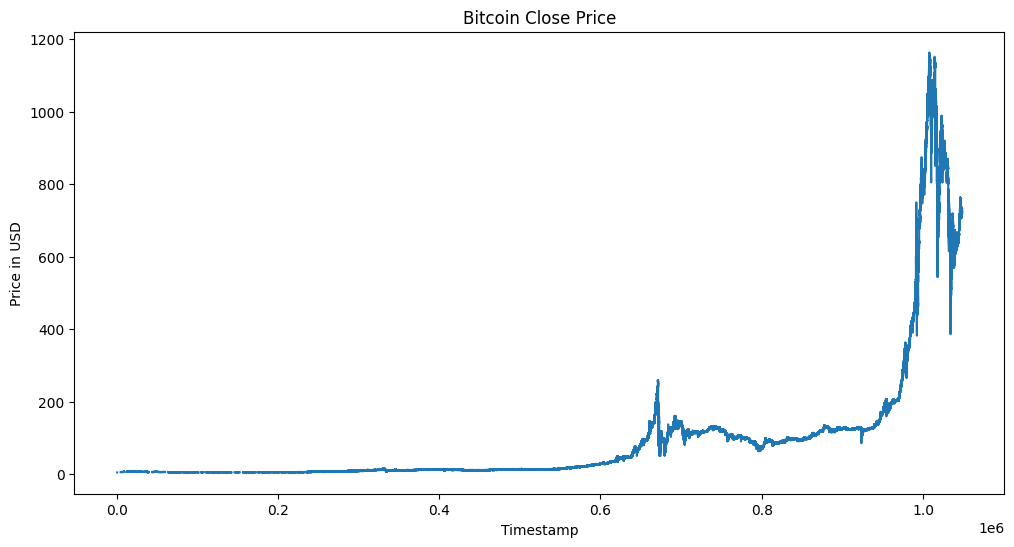

In [ ]:
# EDA
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Price in USD')
plt.show()

In [ ]:
df.isnull().sum()

Timestamp                 0
Open                 706406
High                 706406
Low                  706406
Close                706406
Volume_(BTC)         706406
Volume_(Currency)    706406
Weighted_Price       706406
dtype: int64

In [ ]:
df = df.drop(columns = ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'])
df = df.dropna()

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close
0,1325317920,4.39,4.39,4.39,4.39
478,1325346600,4.39,4.39,4.39,4.39
547,1325350740,4.50,4.57,4.50,4.57
548,1325350800,4.58,4.58,4.58,4.58
1224,1325391360,4.58,4.58,4.58,4.58


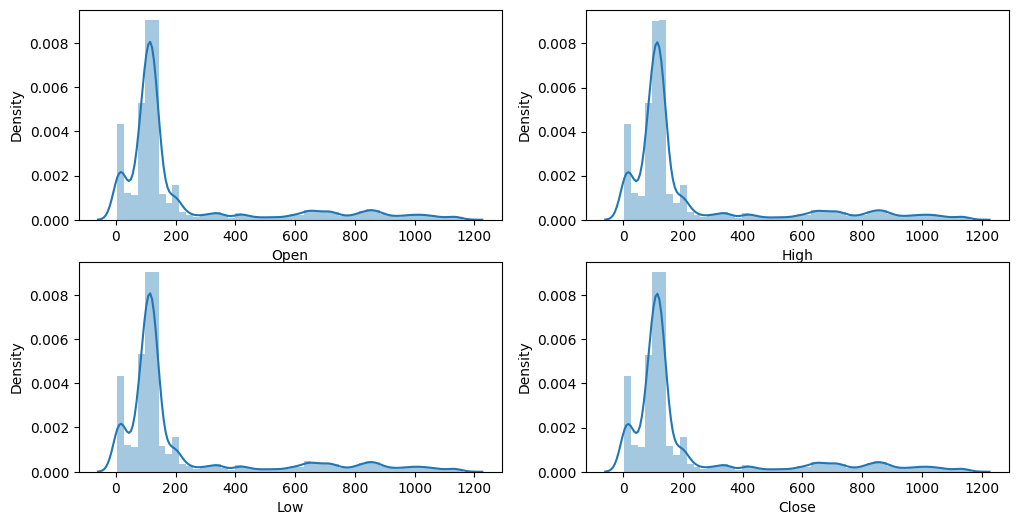

In [ ]:
# Feature Engineering
features = ['Open', 'High', 'Low', 'Close']
# Distribution plot
plt.subplots(figsize=(12, 6))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[col])
plt.show()

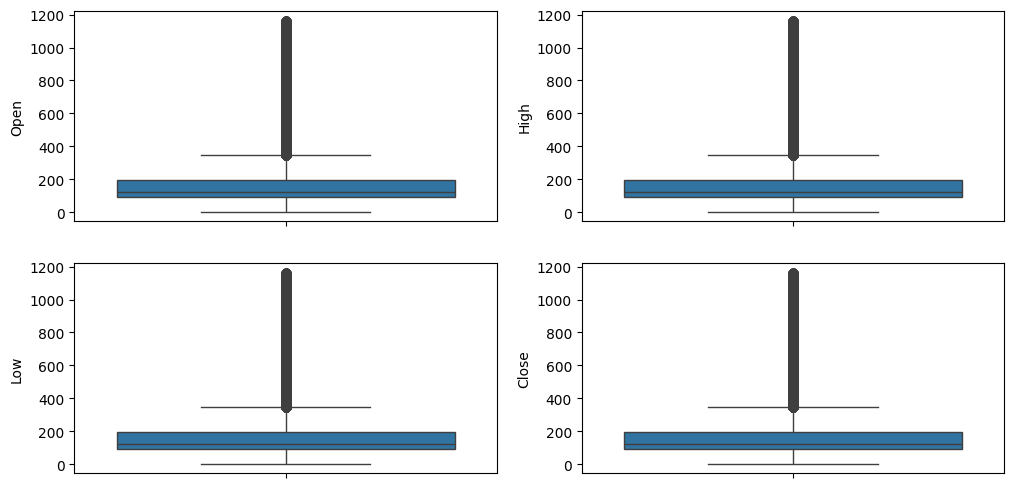

In [ ]:
# Boxplot to check outliers in the data
plt.subplots(figsize=(12, 6))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[col])
plt.show()

In [ ]:
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='s')

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second

df.head()

,Timestamp,Open,High,Low,Close,Datetime,Year,Month,Day,Hour,Minute,Second
0,1325317920,4.39,4.39,4.39,4.39,2011-12-31 07:52:00,2011,12,31,7,52,0
478,1325346600,4.39,4.39,4.39,4.39,2011-12-31 15:50:00,2011,12,31,15,50,0
547,1325350740,4.50,4.57,4.50,4.57,2011-12-31 16:59:00,2011,12,31,16,59,0
548,1325350800,4.58,4.58,4.58,4.58,2011-12-31 17:00:00,2011,12,31,17,0,0
1224,1325391360,4.58,4.58,4.58,4.58,2012-01-01 04:16:00,2012,1,1,4,16,0


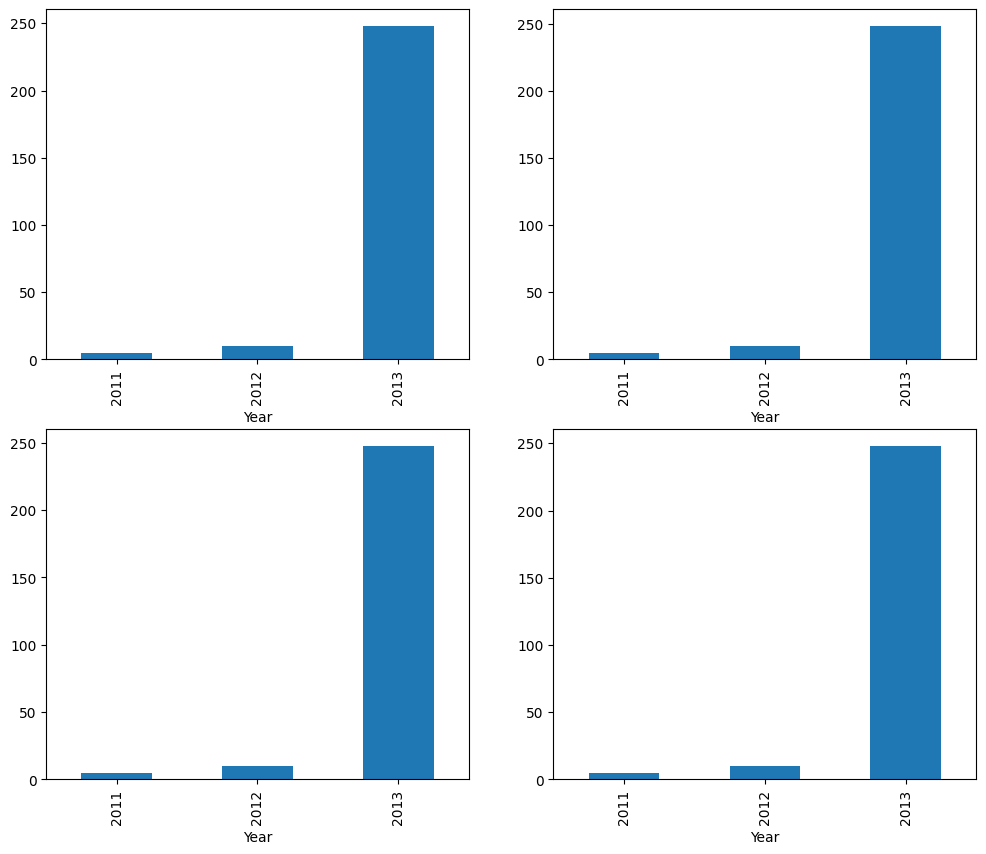

In [ ]:
grouped_data = df.groupby('Year').mean()
plt.subplots(figsize=(12, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    grouped_data[col].plot.bar()

plt.show()

In [ ]:
df['is_quarter_end'] = np.where(df['Month'] % 3 == 0, 1, 0)
df.head()

,Timestamp,Open,High,Low,Close,Datetime,Year,Month,Day,Hour,Minute,Second,is_quarter_end
0,1325317920,4.39,4.39,4.39,4.39,2011-12-31 07:52:00,2011,12,31,7,52,0,1
478,1325346600,4.39,4.39,4.39,4.39,2011-12-31 15:50:00,2011,12,31,15,50,0,1
547,1325350740,4.50,4.57,4.50,4.57,2011-12-31 16:59:00,2011,12,31,16,59,0,1
548,1325350800,4.58,4.58,4.58,4.58,2011-12-31 17:00:00,2011,12,31,17,0,0,1
1224,1325391360,4.58,4.58,4.58,4.58,2012-01-01 04:16:00,2012,1,1,4,16,0,0


In [ ]:
df['Open-Close'] = df['Open'] - df['Close']
df['Low-High'] = df['Low'] - df['High']
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

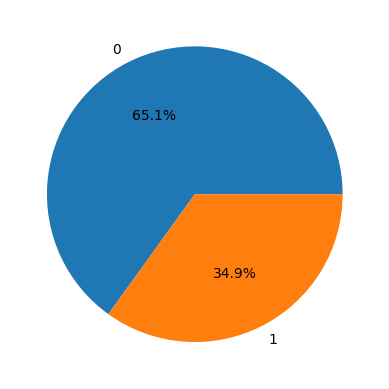

In [ ]:
plt.pie(df['Target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

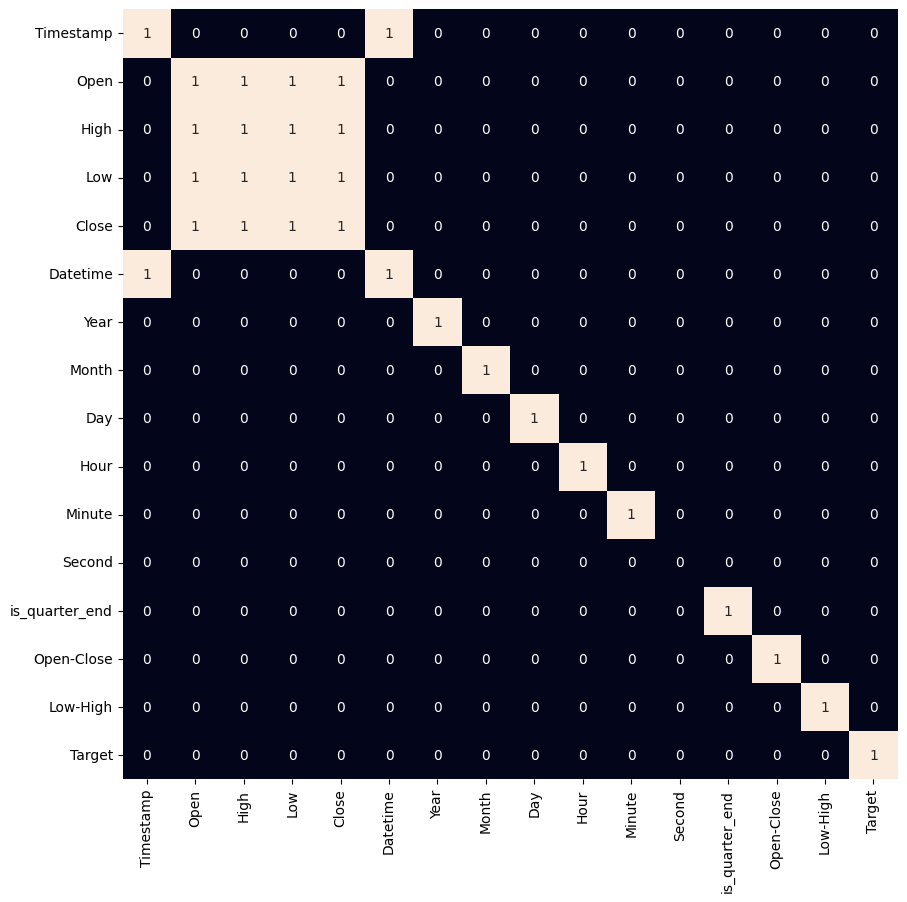

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['Open-Close', 'Low-High', 'is_quarter_end']]
target = df['Target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(273735, 3) (68434, 3)


In [ ]:
def plot_confusion_matrix(y_test, yhat):
  cm = confusion_matrix(y_test, yhat)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels([0, 1])
  ax.yaxis.set_ticklabels([0, 1])
  plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
lr_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
print('Tuned hyperparameters: (best parameters)', lr_cv.best_params_)
print('Best Score: ', lr_cv.best_score_)
print('Accuracy: ', lr_cv.score(x_test, y_test))

Tuned hyperparameters: (best parameters) {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.6530111241150711
Accuracy:  0.6541339100447147


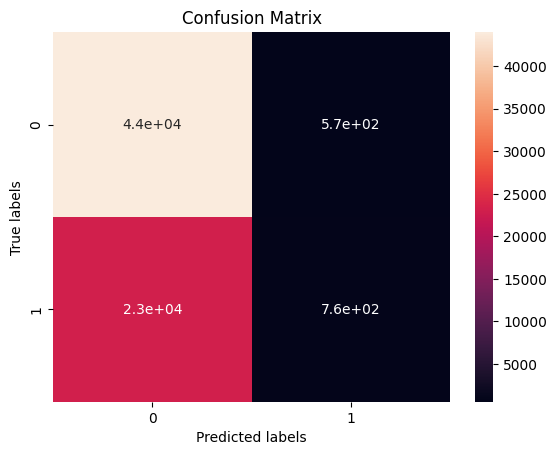

In [ ]:
yhat = lr_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('Accuracy: ', xgb.score(x_test, y_test))

Accuracy:  0.6648011222491744


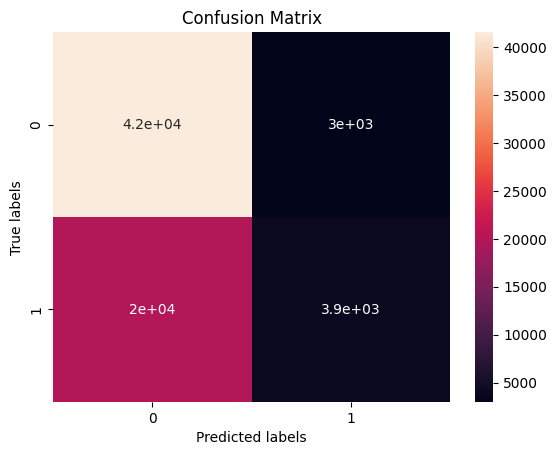

In [ ]:
yhat = xgb.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

Accuracy:  0.6374755238624076


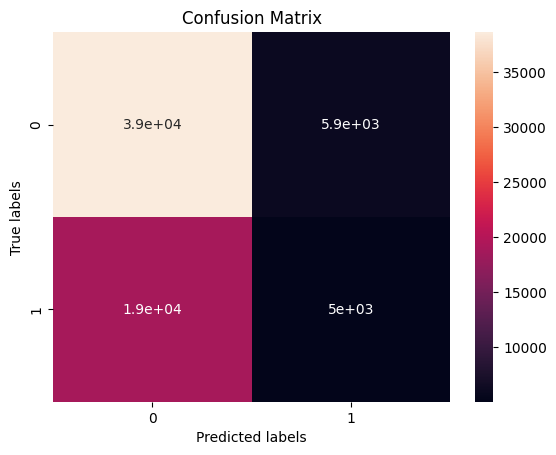

In [ ]:
print('Accuracy: ', knn.score(x_test, y_test))
yhat = knn.predict(x_test)
plot_confusion_matrix(y_test, yhat)